<a href="https://colab.research.google.com/github/AlvinChiew/MachineLearning/blob/main/Sklearn_proj_IndoorLocationIdentifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
- Predict the location of coordinates of a person, i.e. (bedroom, foyer, kitchen, living room or SOHO) received through sensors at 5 different placement in the unit

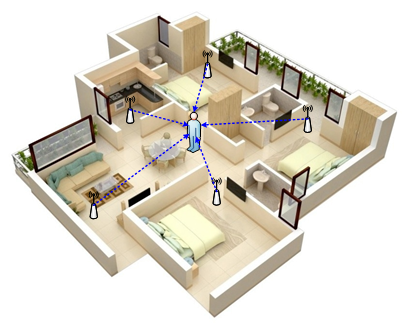

# Import Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from warnings import filterwarnings
filterwarnings('ignore')

# Load data

In [2]:
!wget https://raw.githubusercontent.com/AlvinChiew/MachineLearning/main/raw_data/sklearn_proj_IndoorLocationIdentifier.csv

--2020-12-15 15:01:20--  https://raw.githubusercontent.com/AlvinChiew/MachineLearning/main/raw_data/sklearn_proj_IndoorLocationIdentifier.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16901 (17K) [text/plain]
Saving to: ‘sklearn_proj_IndoorLocationIdentifier.csv’

sklearn_proj_Indoor 100%[===================>]  16.50K  --.-KB/s    in 0s      

2020-12-15 15:01:20 (128 MB/s) - ‘sklearn_proj_IndoorLocationIdentifier.csv’ saved [16901/16901]



In [47]:
df = pd.read_csv('sklearn_proj_IndoorLocationIdentifier.csv')
print(f'data shape : {df.shape}')

data shape : (629, 6)


In [4]:
df

,bedroom,foyer,kitchen,living,soho,location
0,-59,-90,-76,-67,-80,bedroom
1,-59,-95,-79,-77,-70,bedroom
2,-52,-81,-86,-90,-76,bedroom
3,-66,-83,-81,-69,-70,bedroom
4,-71,-91,-90,-77,-71,bedroom
...,...,...,...,...,...,...
624,-92,-84,-86,-96,-69,soho
625,-91,-74,-99,-86,-63,soho
626,-81,-71,-99,-87,-89,soho
627,-90,-84,-86,-82,-76,soho


In [5]:
 df.groupby('location').size()

location
bedroom    121
foyer      106
kitchen    122
living     126
soho       154
dtype: int64

# Pre-Processing

In [6]:
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1:].values

In [7]:
X_train, X_test, y_train, y_test = split(X, y, stratify=y, random_state=1) # by default split to 75% train set and 25% test set 
print(X_train.size, y_train.size, X_test.size, y_test.size)

2355 471 790 158


In [8]:
scl = StandardScaler().fit(X_train)

X_scaled_train = scl.transform(X_train)
X_scaled_test = scl.transform(X_test)

X_scaled_train

array([[-0.0340108 , -1.00744786, -1.42028826, -0.02462274,  0.62441008],
       [ 0.15669262, -1.42313594,  3.39234319,  0.07622342, -0.20119015],
       [-0.89217619,  0.3435384 , -0.61818302,  1.08468502,  0.07400993],
       ...,
       [-0.70147277, -0.48783776,  0.58497484,  1.18553118,  0.16574329],
       [ 1.68231998, -0.48783776,  0.78550115, -0.22631505,  0.62441008],
       [-0.89217619, -0.59175978,  0.685238  , -0.42800737, -0.20119015]])

# Model Training (KNN)

In [17]:
model = KNeighborsClassifier().fit(X_scaled_train, y_train)
print(f'knn score: {model.score(X_scaled_test, y_test):.2%}')

knn score: 75.95%


# Extra: Experiment with classifiers 

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

import matplotlib.pyplot as plt

In [15]:
# Models below are trained with default hyperparameter settings

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LOR', LogisticRegression()))
models.append(('DCT', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('GBT', GradientBoostingClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('SVC', SVC(kernel='linear')))
models.append(('MLP', MLPClassifier()))

In [91]:
# Scores explaination: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

accuracy = []
scores = []

for name, model in models:
    model.fit(X_scaled_train,y_train)
    y_predicted = model.predict(X_scaled_test)
    score = [accuracy_score(y_test, y_predicted),
             precision_score(y_test, y_predicted, average='macro'),
             recall_score(y_test, y_predicted, average='macro'),
             f1_score(y_test, y_predicted, average='macro')]
    accuracy.append((name,score[0]*100))   
    scores.append(score)

## Result

In [92]:
# Interestingly, MULTICLASS LOGISTICS REGRESSION has the best scores with default hyperparam.
accuracy

[('KNN', 75.9493670886076),
 ('LOR', 81.64556962025317),
 ('DCT', 70.88607594936708),
 ('RFC', 77.21518987341773),
 ('GBT', 75.9493670886076),
 ('XGB', 78.48101265822784),
 ('SVC', 79.11392405063292),
 ('MLP', 81.0126582278481)]

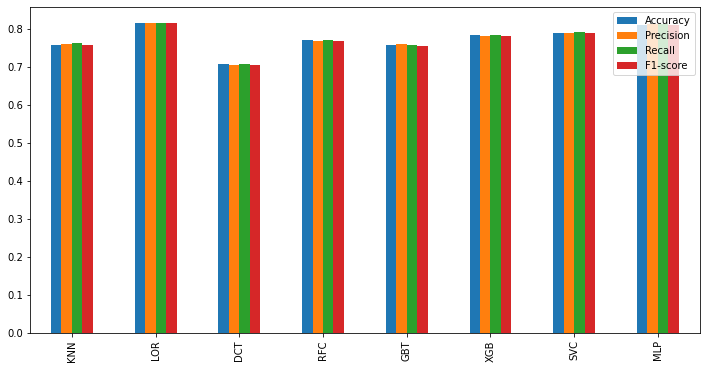

In [93]:
%matplotlib inline
df_scores = pd.DataFrame(scores, index=[model[0] for model in models], columns=['Accuracy', 'Precision', 'Recall', 'F1-score'])
df_scores.plot.bar(figsize=(12, 6))

# Extra: Experiment with feature engineering

In [61]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

## New features based on statistics
- Create new feature based on running average and median of signals to make samples more concentrated in its region.

In [52]:
df_exper = df.copy()
avg_size = 5

for location in df_exper.columns[:-1].values:
    df_exper[f'mean_{location}'] = df[location].rolling(avg_size).mean()
    df_exper[f'median_{location}'] = df[location].rolling(avg_size).median()

df_exper.head(10)

,bedroom,foyer,kitchen,living,soho,location,mean_bedroom,median_bedroom,mean_foyer,median_foyer,mean_kitchen,median_kitchen,mean_living,median_living,mean_soho,median_soho
0,-59,-90,-76,-67,-80,bedroom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-59,-95,-79,-77,-70,bedroom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-52,-81,-86,-90,-76,bedroom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-66,-83,-81,-69,-70,bedroom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-71,-91,-90,-77,-71,bedroom,-61.4,-59.0,-88.0,-90.0,-82.4,-81.0,-76.0,-77.0,-73.4,-71.0
5,-68,-94,-74,-77,-71,bedroom,-63.2,-66.0,-88.8,-91.0,-82.0,-81.0,-78.0,-77.0,-71.6,-71.0
6,-83,-88,-75,-74,-76,bedroom,-68.0,-68.0,-87.4,-88.0,-81.2,-81.0,-77.4,-77.0,-72.8,-71.0
7,-67,-78,-76,-81,-66,bedroom,-71.0,-68.0,-86.8,-88.0,-79.2,-76.0,-75.6,-77.0,-70.8,-71.0
8,-61,-85,-84,-81,-84,bedroom,-70.0,-68.0,-87.2,-88.0,-79.8,-76.0,-78.0,-77.0,-73.6,-71.0
9,-68,-94,-88,-92,-87,bedroom,-69.4,-68.0,-87.8,-88.0,-79.4,-76.0,-81.0,-81.0,-76.8,-76.0


In [63]:
df_exper.dropna(inplace=True)
X_exper = df_exper.loc[:, df_exper.columns != 'location'].values
y_exper = df_exper.location.values
X_exper_train, X_exper_test, y_exper_train, y_exper_test = split(X_exper, y_exper, stratify=y_exper, random_state=1)

## Pipeline grid search for scaing method and feature selection
- Find the best scaling method and most effective features (k = 1 to 10) for SVM

In [70]:
pipe = Pipeline([('scl', None), ('fs', SelectKBest()), ('svc', SVC())])
params = dict(scl = [None, MinMaxScaler(),StandardScaler(),RobustScaler()],
             fs__k = range(1,11),
             svc__kernel = ['linear','rbf'],
             svc__C = [0.0001,0.001,0.01,0.1,1,10],
             svc__gamma = [0.0001,0.001,0.01,0.1,1,10])
kfold = StratifiedKFold(n_splits=3, random_state=1)
gs = GridSearchCV(pipe,params,cv=kfold, n_jobs=-1, verbose=2)
gs.fit(X_exper_train, y_exper_train)
print()
print(f'Best hyperparameters for SVC: {gs.best_params_}')

Fitting 3 folds for each of 2880 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 246 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 2182 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 5430 tasks      | elapsed:   36.3s



Best hyperparameters for SVC: {'fs__k': 8, 'scl': None, 'svc__C': 10, 'svc__gamma': 0.0001, 'svc__kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 8640 out of 8640 | elapsed:   57.1s finished


## Result

In [71]:
pipe.set_params(**gs.best_params_)      # unpack hyperparams   
pipe.fit(X_exper_train, y_exper_train)
print(f'SVM Score: {pipe.score(X_exper_test, y_exper_test):.2%}')

SVM Score: 99.36%
